<a href="https://colab.research.google.com/github/DimFil320/YPraktikumDS-_Project_SupervisedML/blob/main/YDS_matching_m2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Описание проекта

#### Название проекта:
Мэтчинг товаров с использованием алгоритма приближенных соседей

#### Цель проекта:
Целью проекта является разработка и реализация алгоритма для поиска схожих товаров в большом наборе данных. Основная задача — найти топ-5 наиболее похожих товаров для заданного товара из validation.csv, используя базу данных base.csv, и оценить качество алгоритма с помощью метрики accuracy@5.

#### Задачи проекта:
1. Предобработка данных:
   - Загрузка и анализ предоставленных данных из файлов base.csv, train.csv, validation.csv и validation_answer.csv.
   - Проверка целостности и корректности данных.
   
2. Разработка алгоритма приближенных соседей:
   - Выбор и реализация подходящего алгоритма для поиска ближайших соседей, например, k-мерное дерево (k-d tree), локально чувствительное хэширование (LSH), фаустический лес (Faiss) и др.
   - Обучение модели на основе данных из train.csv.
   
3. Поиск схожих товаров:
   - Применение обученного алгоритма к товарам из validation.csv для нахождения топ-5 наиболее похожих товаров из базы данных base.csv.
   
4. Оценка качества алгоритма:
   - Сопоставление результатов работы алгоритма с эталонными ответами из validation_answer.csv.
   - Вычисление метрики accuracy@5 для оценки точности рекомендаций алгоритма.
   
5. Анализ и улучшение модели:
   - Анализ результатов и выявление возможных улучшений модели.
   - Внесение корректировок и повторное обучение модели для повышения точности.

6. Документация и отчетность:
   - Подготовка финального отчета с описанием выполненной работы, использованных методов и достигнутых результатов.
   - Документирование кода и методов для обеспечения воспроизводимости.

#### Исходные данные:
1. base.csv:
   - Описание: база данных со всеми товарами.
   - Структура: каждый товар представлен уникальным id (0-base, 1-base, ...) и вектором признаков размерностью 72.

2. train.csv:
   - Описание: обучающий датасет, содержащий информацию о товарах и их наиболее похожих парах из базы данных.
   - Структура: каждая строка представляет товар с уникальным id (0-query, 1-query, ...), вектором признаков и id товара из base.csv, который максимально похож на него по мнению экспертов.

3. validation.csv:
   - Описание: валидационный датасет, содержащий товары, для которых необходимо найти наиболее похожие товары из base.csv.
   - Структура: уникальный id и вектор признаков.

4. validation_answer.csv:
   - Описание: база данных с правильными ответами для товаров из validation.csv.
   - Структура: уникальный id товара из validation.csv и соответствующий id товара из base.csv, который считается наиболее похожим.
- Все данные зараннее переведены в виде векторов чисел - эмбеддинги.

#### Метрика оценки:
accuracy@5:
- Определение: метрика accuracy@5 показывает, насколько часто правильный ответ попадает в топ-5 рекомендаций, сгенерированных алгоритмом.
- Вычисление: для каждого товара из validation.csv проверяется, присутствует ли правильный ответ из validation_answer.csv в топ-5 рекомендациях. Общая точность вычисляется как доля таких успешных попаданий от общего числа товаров.

### План реализации проекта:

1. Подготовка данных:
   - Загрузка и предварительный анализ данных.
   - Проверка и обработка пропущенных значений.
   
2. Разработка и обучение модели:
   - Выбор алгоритма для поиска ближайших соседей.
   - Обучение модели на данных из train.csv.

3. Валидация модели:
   - Применение модели для поиска похожих товаров из validation.csv.
   - Сопоставление результатов с эталонными ответами.

4. Оценка качества:
   - Вычисление метрики accuracy@5.
   - Анализ результатов и внесение возможных улучшений.

5. Подготовка отчета:
   - Описание методов и результатов.
   - Документирование кода и выводов.

Этот проект предполагает использование алгоритмов машинного обучения и методов анализа данных для эффективного решения задачи по поиску схожих товаров, что может быть применимо в различных коммерческих и исследовательских задачах.

###Загрузка данных

In [1]:
#импорт библиотек
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import faiss

!pip install faiss-cpu




In [2]:
df_base = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Training/Masterskaya_2/data/base.csv')

In [3]:
df_train = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Training/Masterskaya_2/data/train.csv')
df_validation = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Training/Masterskaya_2/data/validation.csv')
df_answer = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Training/Masterskaya_2/data/validation_answer.csv')

Посмотрим на все датасеты, что собой представляют и выгрузим информацию по ним.

In [4]:
df_train.head()

,Id,0,1,2,3,4,5,6,7,8,...,63,64,65,66,67,68,69,70,71,Target
0,0-query,-53.882748,17.971436,-42.117104,-183.93668,187.517490,-87.144930,-347.360606,38.307602,109.085560,...,70.107360,-155.80257,-101.965943,65.903790,34.457500,62.642094,134.763600,-415.750254,-25.958572,675816-base
1,1-query,-87.776370,6.806268,-32.054546,-177.26039,120.803330,-83.810590,-94.572749,-78.433090,124.915900,...,4.669178,-151.69771,-1.638704,68.170876,25.096191,89.974976,130.589630,-1035.092211,-51.276833,366656-base
2,2-query,-49.979565,3.841486,-116.118590,-180.40198,190.128430,-50.837620,26.943937,-30.447489,125.771164,...,78.039764,-169.14620,82.144186,66.008220,18.400496,212.409730,121.931470,-1074.464888,-22.547178,1447819-base
3,3-query,-47.810562,9.086598,-115.401695,-121.01136,94.652840,-109.255410,-775.150134,79.186520,124.003100,...,44.515266,-145.41675,93.990981,64.131350,106.061920,83.178760,118.277725,-1074.464888,-19.902788,1472602-base
4,4-query,-79.632126,14.442886,-58.903397,-147.05254,57.127068,-16.239529,-321.317964,45.984676,125.941284,...,45.028910,-196.09207,-117.626337,66.926220,42.456170,77.621765,92.479930,-1074.464888,-21.149351,717819-base


In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 74 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Id      100000 non-null  object 
 1   0       100000 non-null  float64
 2   1       100000 non-null  float64
 3   2       100000 non-null  float64
 4   3       100000 non-null  float64
 5   4       100000 non-null  float64
 6   5       100000 non-null  float64
 7   6       100000 non-null  float64
 8   7       100000 non-null  float64
 9   8       100000 non-null  float64
 10  9       100000 non-null  float64
 11  10      100000 non-null  float64
 12  11      100000 non-null  float64
 13  12      100000 non-null  float64
 14  13      100000 non-null  float64
 15  14      100000 non-null  float64
 16  15      100000 non-null  float64
 17  16      100000 non-null  float64
 18  17      100000 non-null  float64
 19  18      100000 non-null  float64
 20  19      100000 non-null  float64
 21  20      100

In [6]:
df_validation.head()

,Id,0,1,2,3,4,5,6,7,8,...,62,63,64,65,66,67,68,69,70,71
0,100000-query,-57.372734,3.597752,-13.213642,-125.92679,110.74594,-81.279594,-461.003172,139.815720,112.880980,...,-75.51302,52.830902,-143.43945,59.051935,69.28224,61.927513,111.59253,115.140656,-1099.130485,-117.079360
1,100001-query,-53.758705,12.790300,-43.268543,-134.41762,114.44991,-90.520130,-759.626065,63.995087,127.117905,...,-79.44183,29.185436,-168.60590,-82.872443,70.76560,-65.975950,97.07716,123.391640,-744.442332,-25.009320
2,100002-query,-64.175095,-3.980927,-7.679249,-170.16093,96.44616,-62.377740,-759.626065,87.477554,131.270110,...,-134.79541,37.368730,-159.66231,-119.232725,67.71044,86.002060,137.63641,141.081630,-294.052271,-70.969604
3,100003-query,-99.286860,16.123936,9.837166,-148.06044,83.69708,-133.729720,58.576403,-19.046660,115.042404,...,-77.23611,44.100494,-132.53012,-106.318982,70.88396,23.577892,133.18396,143.252940,-799.363667,-89.392670
4,100004-query,-79.532920,-0.364173,-16.027431,-170.88495,165.45392,-28.291668,33.931936,34.411217,128.903980,...,-123.77025,45.635944,-134.25893,13.735359,70.61763,15.332115,154.56812,101.700640,-1171.892332,-125.307890


In [7]:
df_validation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 73 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Id      100000 non-null  object 
 1   0       100000 non-null  float64
 2   1       100000 non-null  float64
 3   2       100000 non-null  float64
 4   3       100000 non-null  float64
 5   4       100000 non-null  float64
 6   5       100000 non-null  float64
 7   6       100000 non-null  float64
 8   7       100000 non-null  float64
 9   8       100000 non-null  float64
 10  9       100000 non-null  float64
 11  10      100000 non-null  float64
 12  11      100000 non-null  float64
 13  12      100000 non-null  float64
 14  13      100000 non-null  float64
 15  14      100000 non-null  float64
 16  15      100000 non-null  float64
 17  16      100000 non-null  float64
 18  17      100000 non-null  float64
 19  18      100000 non-null  float64
 20  19      100000 non-null  float64
 21  20      100

In [8]:
df_answer.head()

,Id,Expected
0,100000-query,2676668-base
1,100001-query,91606-base
2,100002-query,472256-base
3,100003-query,3168654-base
4,100004-query,75484-base


In [9]:
df_answer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   Id        100000 non-null  object
 1   Expected  100000 non-null  object
dtypes: object(2)
memory usage: 1.5+ MB


In [10]:
df_base.head()

,Id,0,1,2,3,4,5,6,7,8,...,62,63,64,65,66,67,68,69,70,71
0,0-base,-115.083890,11.152912,-64.426760,-118.88089,216.482440,-104.698060,-469.070588,44.348083,120.915344,...,-42.808693,38.800827,-151.76218,-74.389090,63.66634,-4.703861,92.933610,115.269190,-112.756640,-60.830353
1,1-base,-34.562202,13.332763,-69.787610,-166.53348,57.680607,-86.098370,-85.076666,-35.637436,119.718636,...,-117.767525,41.100000,-157.82940,-94.446806,68.20211,24.346846,179.937930,116.834000,-84.888941,-59.524610
2,2-base,-54.233746,6.379371,-29.210136,-133.41383,150.895830,-99.435326,52.554795,62.381706,128.951450,...,-76.397800,46.011803,-207.14442,127.325570,65.56618,66.325680,81.073490,116.594154,-1074.464888,-32.527206
3,3-base,-87.520130,4.037884,-87.803030,-185.06763,76.369540,-58.985165,-383.182845,-33.611237,122.031910,...,-70.647940,-6.358921,-147.20105,-37.692750,66.20289,-20.566910,137.206940,117.474100,-1074.464888,-72.915490
4,4-base,-72.743850,6.522049,43.671265,-140.60803,5.820023,-112.074080,-397.711282,45.182500,122.167180,...,-57.199104,56.642403,-159.35184,85.944724,66.76632,-2.505783,65.315285,135.051590,-1074.464888,0.319401


In [11]:
df_base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2918139 entries, 0 to 2918138
Data columns (total 73 columns):
 #   Column  Dtype  
---  ------  -----  
 0   Id      object 
 1   0       float64
 2   1       float64
 3   2       float64
 4   3       float64
 5   4       float64
 6   5       float64
 7   6       float64
 8   7       float64
 9   8       float64
 10  9       float64
 11  10      float64
 12  11      float64
 13  12      float64
 14  13      float64
 15  14      float64
 16  15      float64
 17  16      float64
 18  17      float64
 19  18      float64
 20  19      float64
 21  20      float64
 22  21      float64
 23  22      float64
 24  23      float64
 25  24      float64
 26  25      float64
 27  26      float64
 28  27      float64
 29  28      float64
 30  29      float64
 31  30      float64
 32  31      float64
 33  32      float64
 34  33      float64
 35  34      float64
 36  35      float64
 37  36      float64
 38  37      float64
 39  38      float64
 40  

###Предобработка данных:

In [12]:
#Посмотрим дубликаты
df_base.duplicated().sum()

0

Дубликатов в основном датасете нет.

In [13]:
df_train.duplicated().sum()

0

Дубликатов в тренировочном датасете тоже не имееются.

**Вывод после загрузки и предобработки данных:**
- Пропусков по информации выше тоже как видно обнаружены не были.
- К типам данным тоже никаких вопросов.
- Явные дубликаты отсутствуют, неявные мы не можем искать, так как значения уже переведены в векторную плоскость.

###EDA

In [14]:
df_base.describe().T

,count,mean,std,min,25%,50%,75%,max
0,2918139.0,-86.229474,24.891320,-199.468700,-103.065438,-86.231500,-69.256577,21.515549
1,2918139.0,8.080077,4.953387,-13.914608,4.708491,8.038950,11.470066,29.937210
2,2918139.0,-44.580804,38.631660,-240.073400,-69.559490,-43.816605,-19.625266,160.937230
3,2918139.0,-146.634991,19.844805,-232.667140,-159.905060,-146.776810,-133.327655,-51.374780
4,2918139.0,111.316628,46.348090,-105.582960,80.507945,111.873000,142.374275,319.664500
...,...,...,...,...,...,...,...,...
67,2918139.0,23.544896,55.342236,-233.138170,-12.516241,23.416494,59.755113,314.898770
68,2918139.0,74.959301,61.345005,-203.601620,33.775737,74.929970,115.876040,339.573850
69,2918139.0,115.566716,21.175183,15.724480,101.686670,116.024445,129.552375,214.706340
70,2918139.0,-799.339026,385.413088,-1297.931468,-1074.464888,-1074.464888,-505.744456,98.770811


Интерпретация:

- Признак 0 имеет среднее значение -86.23, что указывает на общую тенденцию значений к отрицательным значениям.
- Признак 1 имеет низкое стандартное отклонение (4.95), что указывает на меньшую вариабельность значений.
- Признак 3 имеет минимальное значение -232.67 и максимальное -51.37, что указывает на высокую концентрацию отрицательных значений.
- Признак 4 имеет положительное среднее значение 111.32, что свидетельствует о большей концентрации положительных значений в этом признаке и более широкий диапазон значений.

- Признак 70 имеет самое большое стандартное отклонение (385.41), что говорит о высокой дисперсии значений. Перцентиль 25% составляет -1074.46, медиана также -1074.46, а перцентиль 75% составляет -505.74, что указывает на высокую асимметрию в распределении значений.

In [15]:
df_base.head()

,Id,0,1,2,3,4,5,6,7,8,...,62,63,64,65,66,67,68,69,70,71
0,0-base,-115.083890,11.152912,-64.426760,-118.88089,216.482440,-104.698060,-469.070588,44.348083,120.915344,...,-42.808693,38.800827,-151.76218,-74.389090,63.66634,-4.703861,92.933610,115.269190,-112.756640,-60.830353
1,1-base,-34.562202,13.332763,-69.787610,-166.53348,57.680607,-86.098370,-85.076666,-35.637436,119.718636,...,-117.767525,41.100000,-157.82940,-94.446806,68.20211,24.346846,179.937930,116.834000,-84.888941,-59.524610
2,2-base,-54.233746,6.379371,-29.210136,-133.41383,150.895830,-99.435326,52.554795,62.381706,128.951450,...,-76.397800,46.011803,-207.14442,127.325570,65.56618,66.325680,81.073490,116.594154,-1074.464888,-32.527206
3,3-base,-87.520130,4.037884,-87.803030,-185.06763,76.369540,-58.985165,-383.182845,-33.611237,122.031910,...,-70.647940,-6.358921,-147.20105,-37.692750,66.20289,-20.566910,137.206940,117.474100,-1074.464888,-72.915490
4,4-base,-72.743850,6.522049,43.671265,-140.60803,5.820023,-112.074080,-397.711282,45.182500,122.167180,...,-57.199104,56.642403,-159.35184,85.944724,66.76632,-2.505783,65.315285,135.051590,-1074.464888,0.319401


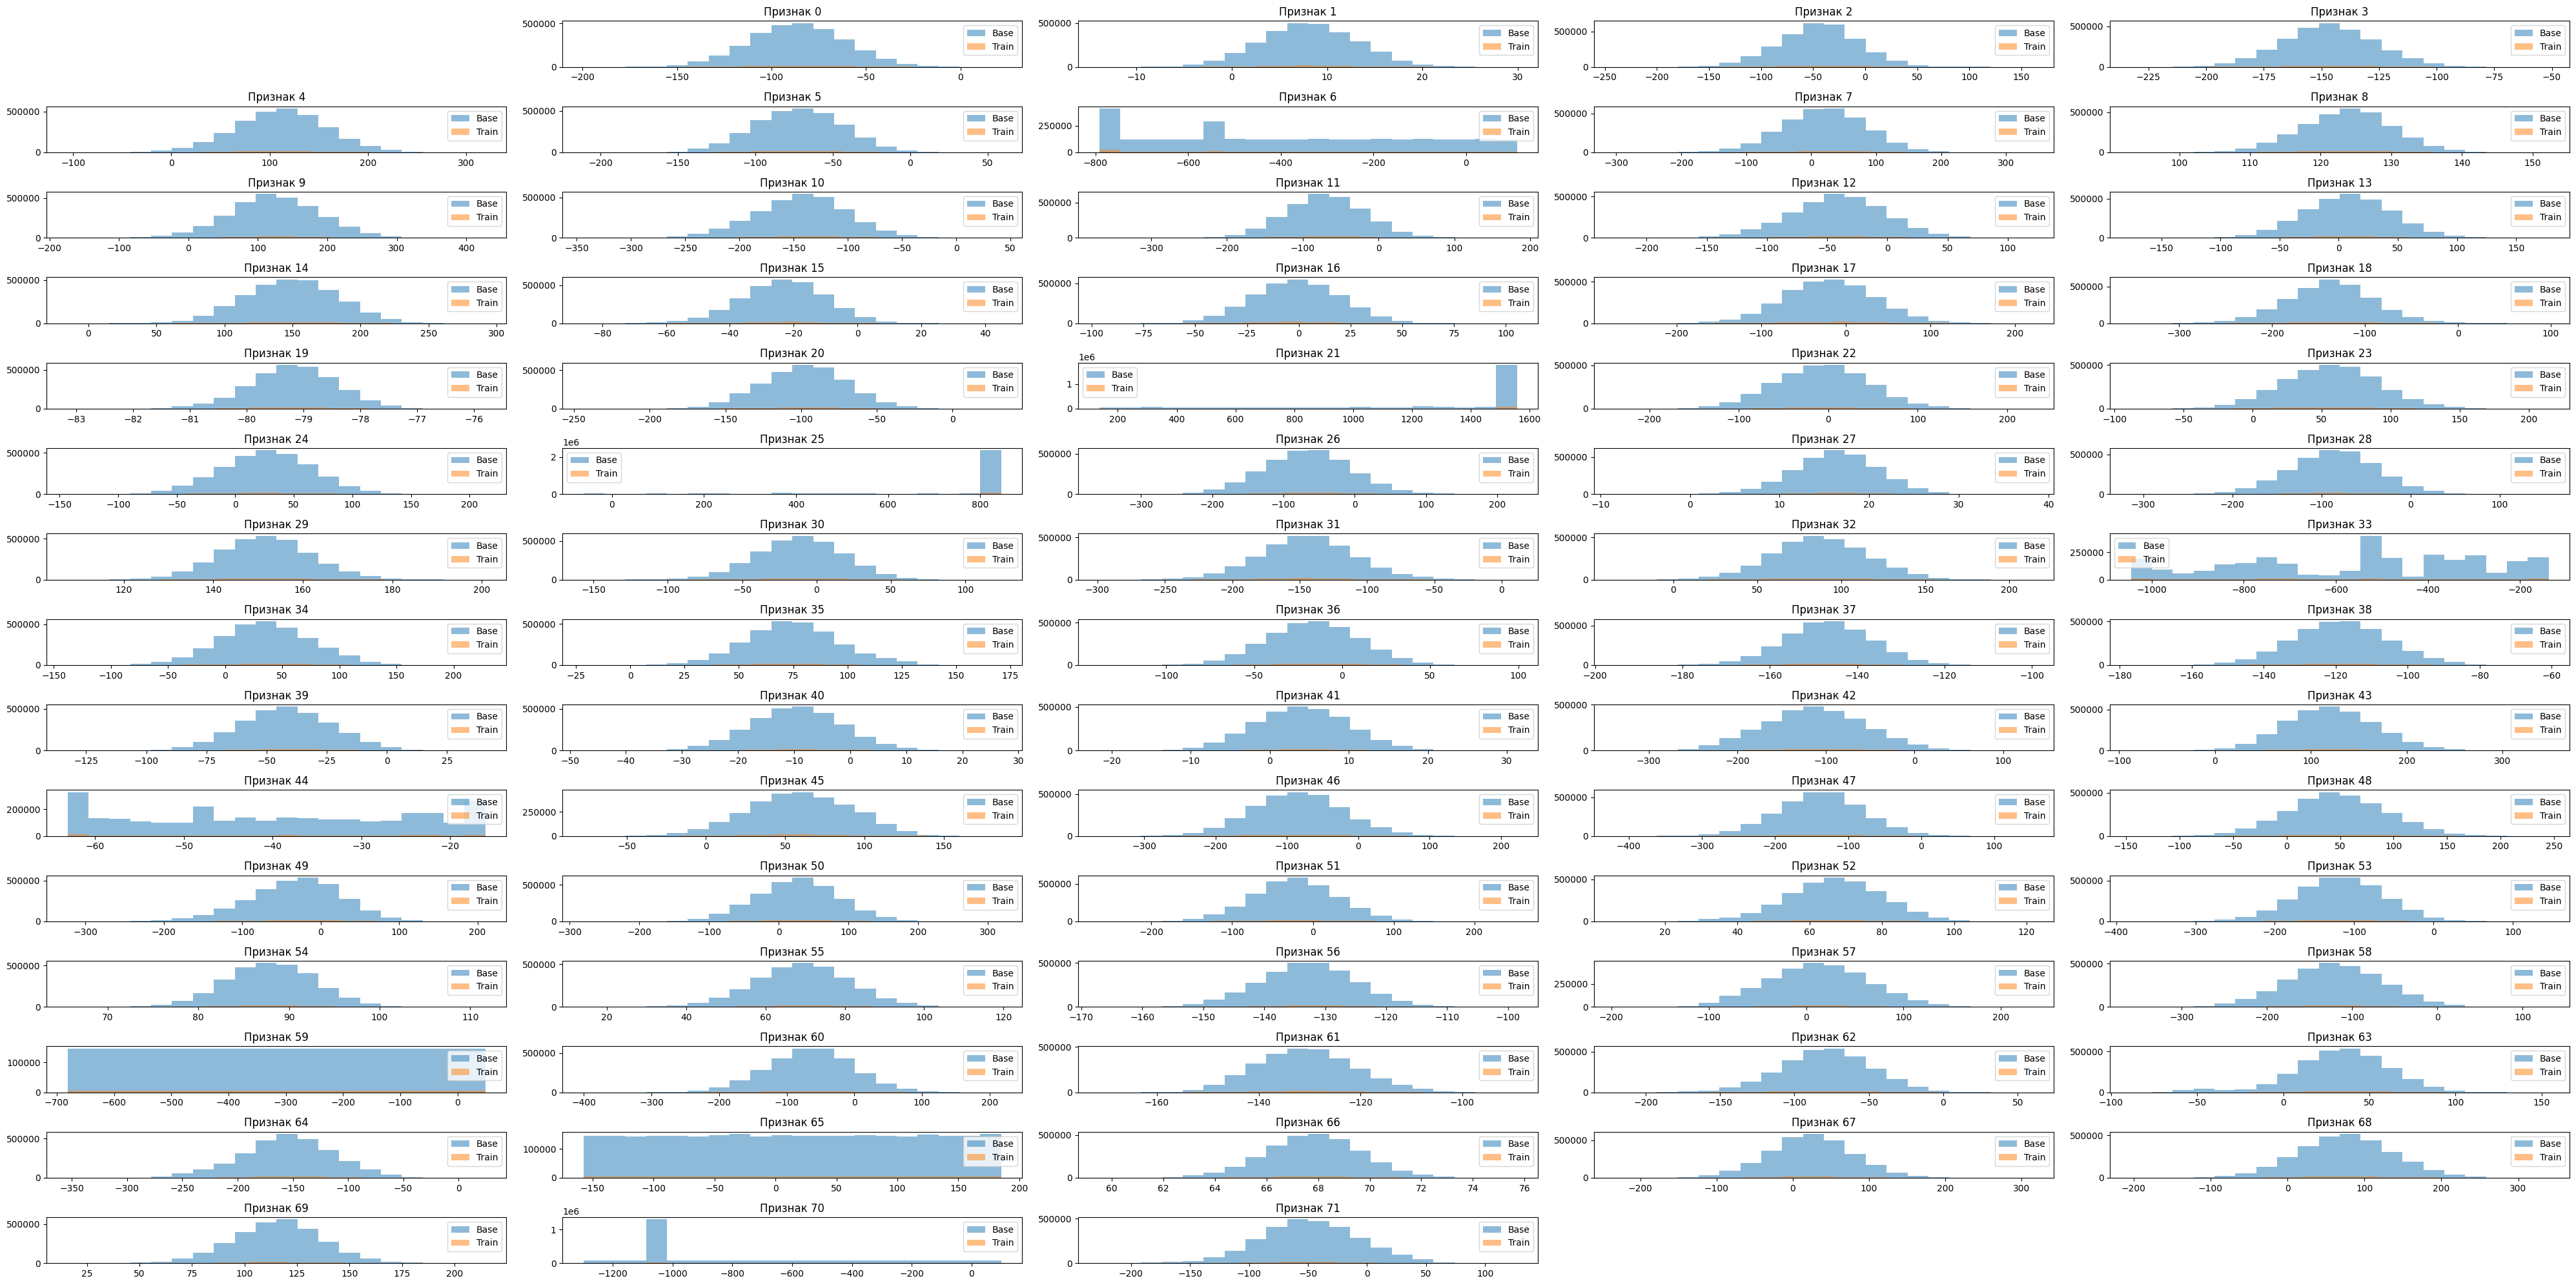

In [16]:
#Построение гистограмм для каждого признака
plt.figure(figsize=(40, 20))  # Увеличиваем размер графика для отображения всех гистограмм

#Итерируемся по всем столбцам
for i, column in enumerate(df_base.columns):
    if column == 'Id':
        continue  #Пропускаем столбец "Id"

    plt.subplot(15, 5, i+1)  #Подбираем количество строк и столбцов так, чтобы поместить все гистограммы
    plt.hist(df_base[column], bins=20, alpha=0.5, label='Base')
    plt.hist(df_train[column], bins=20, alpha=0.5, label='Train')
    plt.title(f'Признак {column}')
    plt.legend()

plt.tight_layout()
plt.show()

В целом гистограммы базового и тренировочных датасетов не выходят сильно за рамки друг друга.

---

По классике нужно еще сравнить боксплоты.

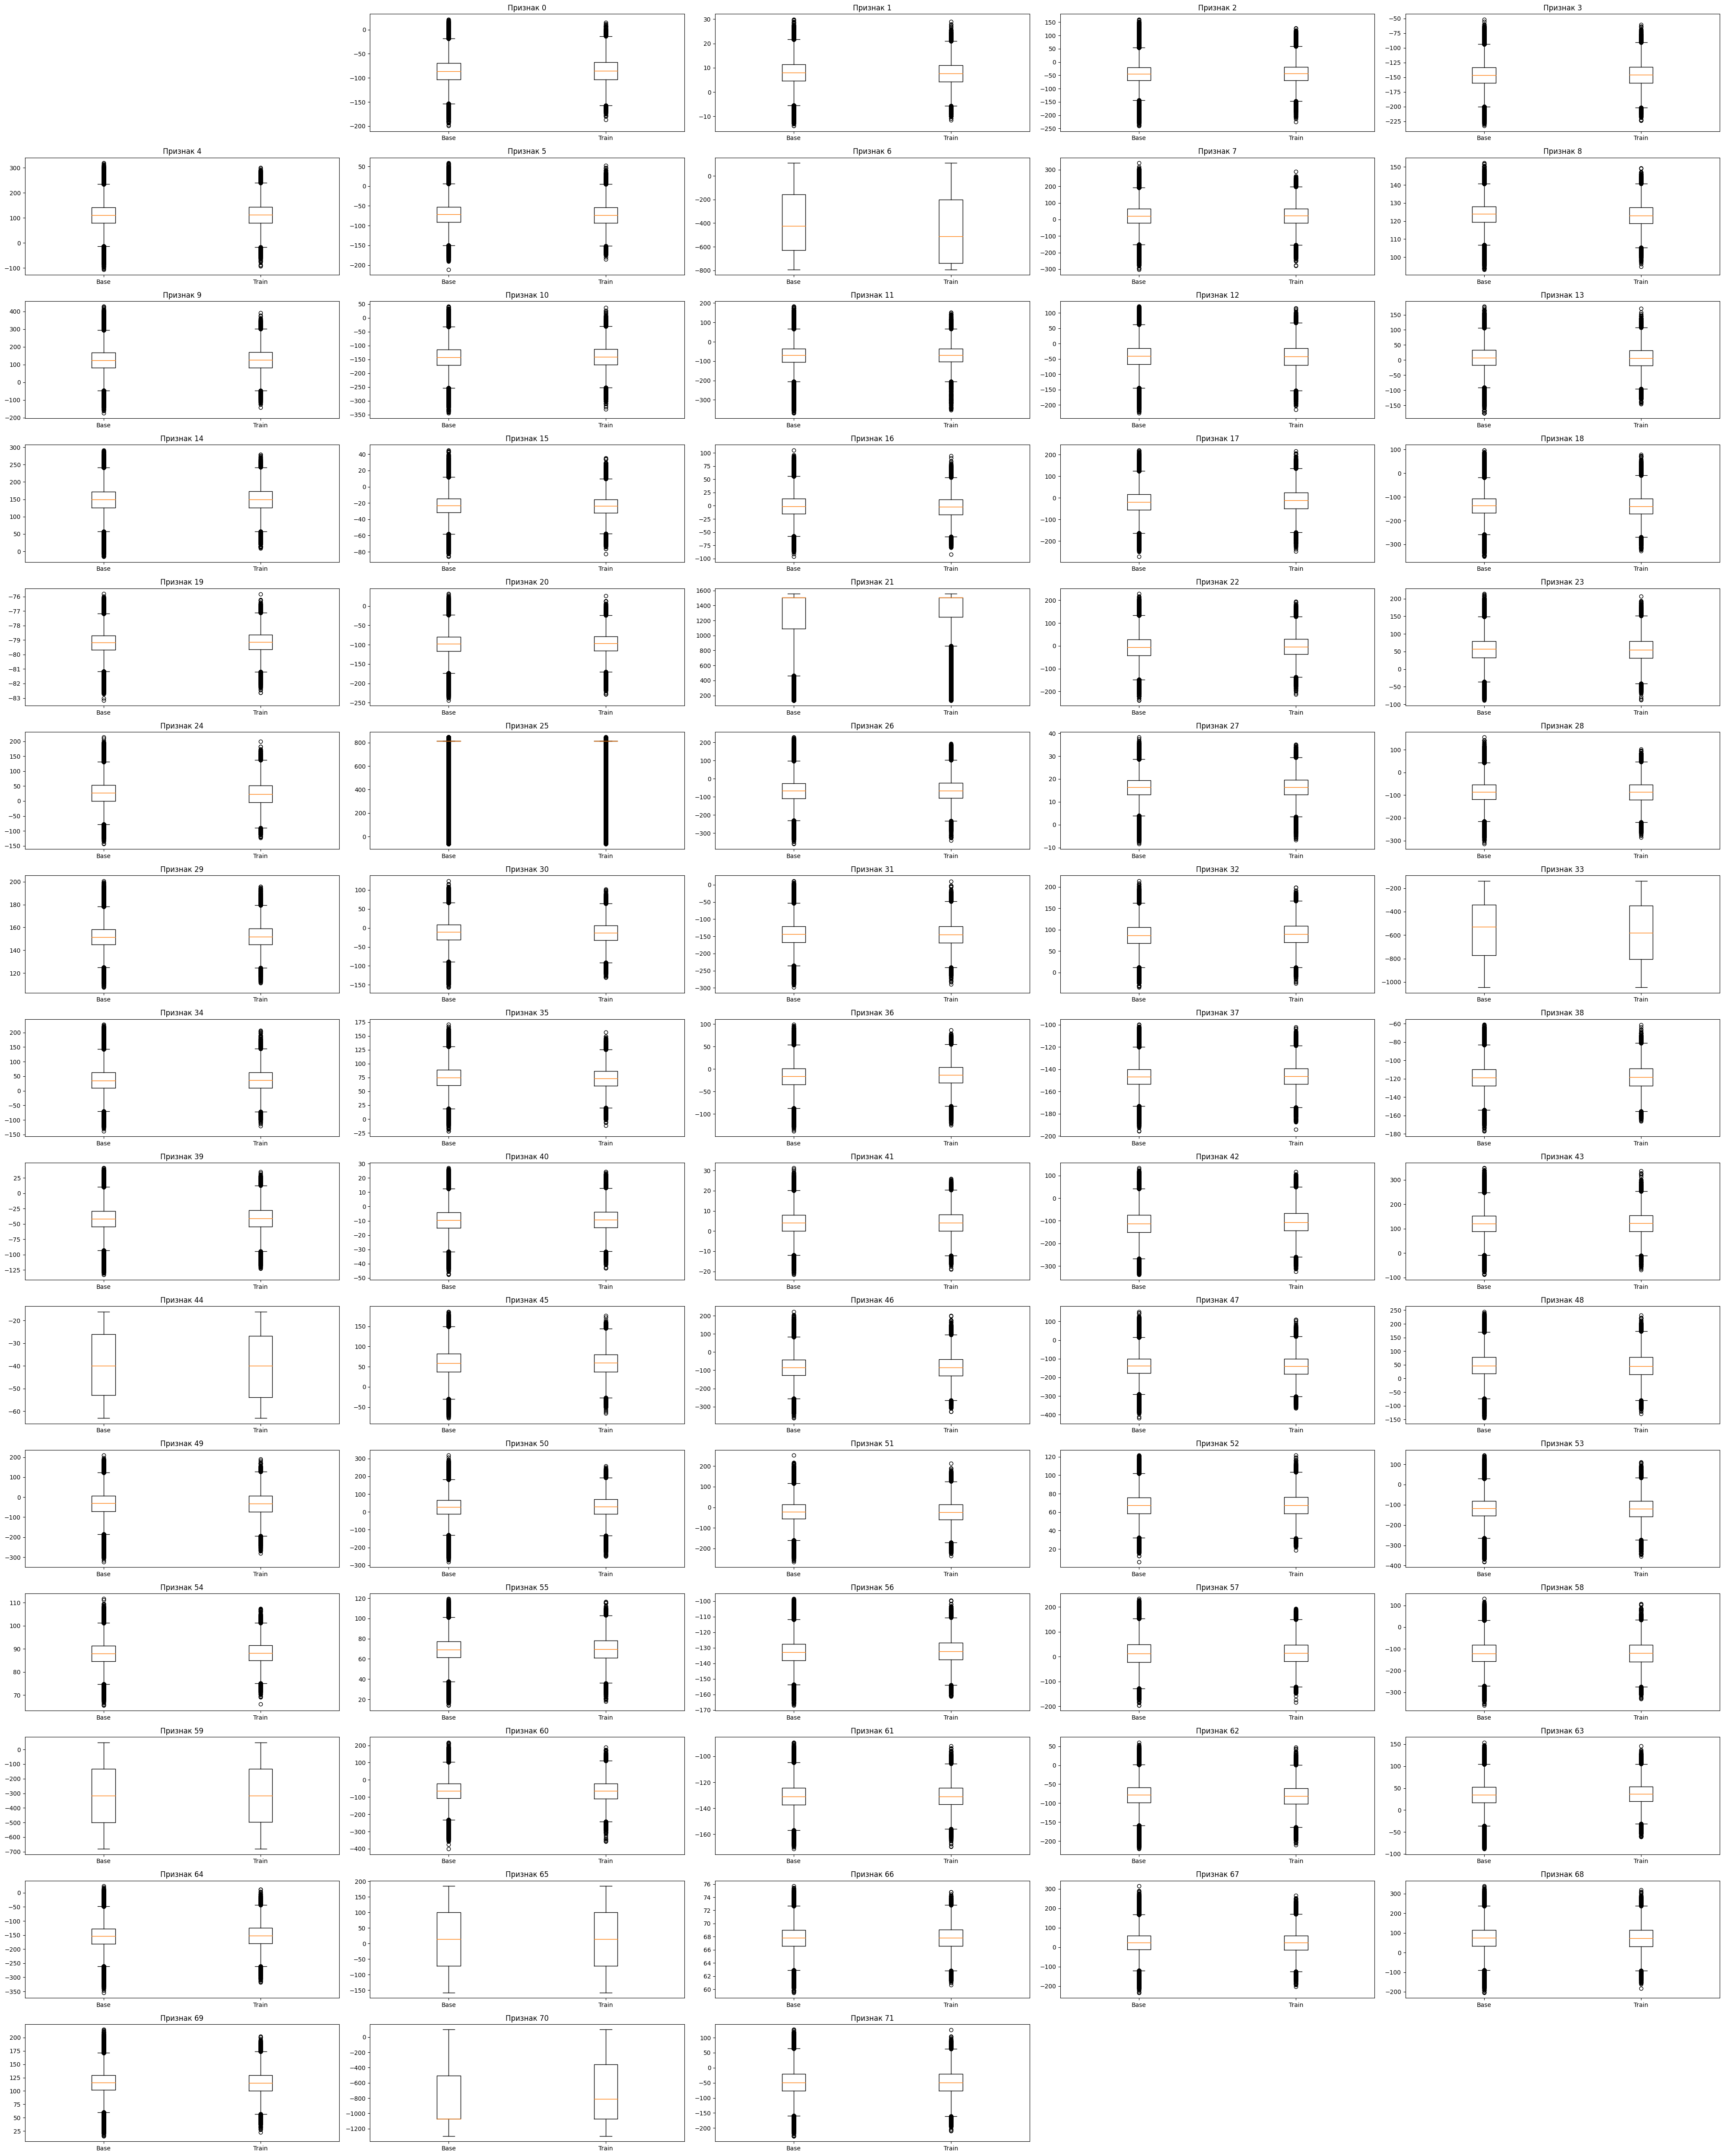

In [17]:
#Строим боксплоты для каждого признака
plt.figure(figsize=(40, 50))  # Увеличиваем размер графика для отображения всех боксплотов

#Итерируемся по всем столбцам
for i, column in enumerate(df_base.columns):
    if column == 'Id':
        continue  #Пропускаем столбец "Id"

    plt.subplot(15, 5, i+1)  #Подбираем количество строк и столбцов так, чтобы поместить все боксплоты
    plt.boxplot([df_base[column], df_train[column]])
    plt.xticks([1, 2], ['Base', 'Train'])
    plt.title(f'Признак {column}')

plt.tight_layout()
plt.show()

Выбросы имеются как в базовом, так и в тренировочном датасетах. Сказать сразу, что от них нужно избавляться не могу. Посмотрю как будет работать модель дальше.

###Корреляционный анализ

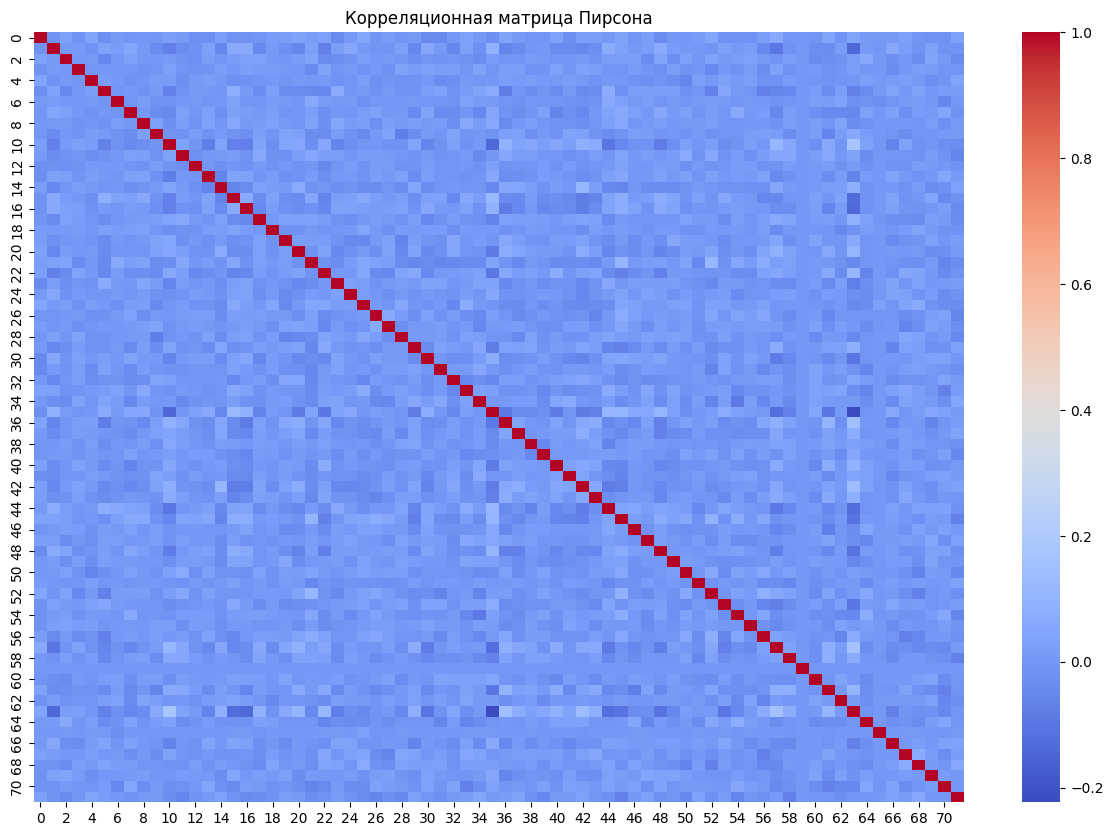

In [18]:
#Исключаем столбцы с нечисловыми данными
numeric_columns = df_base.select_dtypes(include=['number'])

#Вычисление корреляционной матрицы
correlation_matrix = numeric_columns.corr(method='pearson')

# Построение тепловой карты
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, cmap='coolwarm')
plt.title('Корреляционная матрица Пирсона')
plt.show()

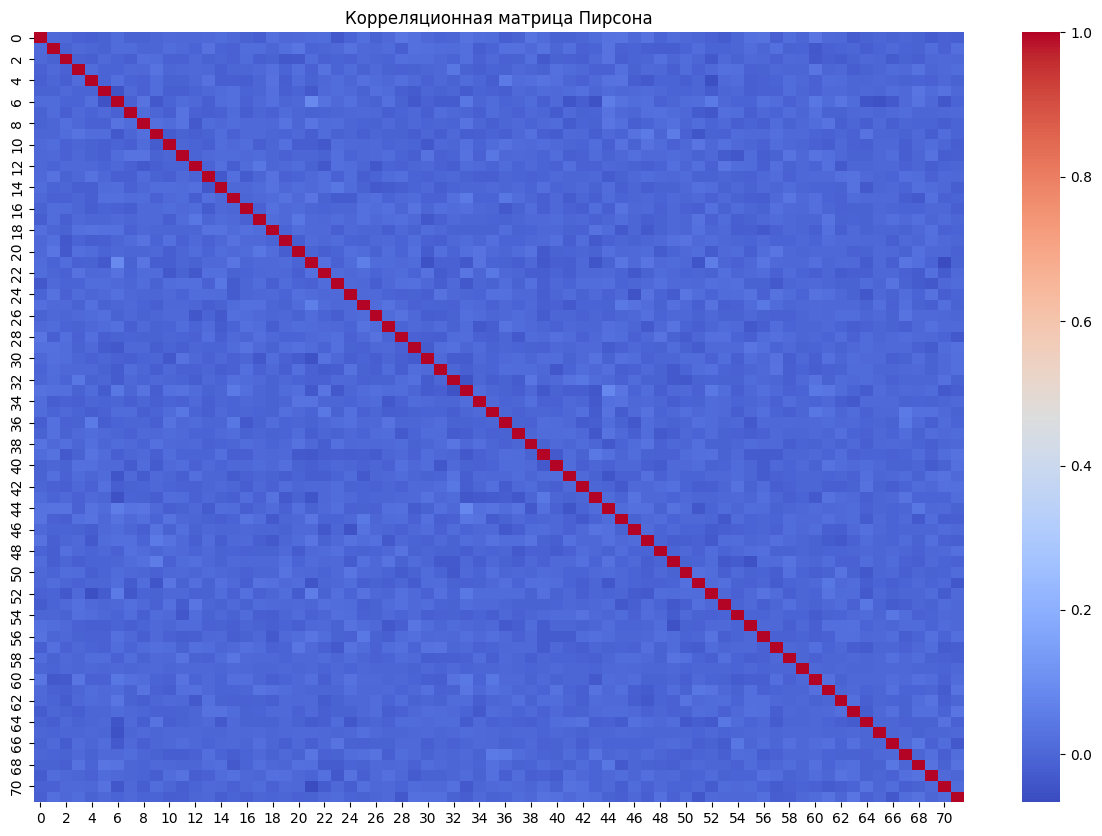

In [19]:
#Исключаем столбцы с нечисловыми данными
numeric_columns = df_train.select_dtypes(include=['number'])

#Вычисление корреляционной матрицы
correlation_matrix = numeric_columns.corr(method='pearson')

#Строим тепловую карту
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, cmap='coolwarm')
plt.title('Корреляционная матрица Пирсона')
plt.show()

Мультиколленеарности в базовом и тренировочном датасетах не обнаружено.

###Подготовка данных:


In [20]:
#масштабируем данные
scaler = StandardScaler()

base_cols = df_base.select_dtypes(include=['float64', 'int64']).columns
df_base[base_cols] = scaler.fit_transform(df_base[base_cols])

train_cols = df_train.select_dtypes(include=['float64', 'int64']).columns
df_train[train_cols] = scaler.fit_transform(df_train[train_cols])

df_validation[train_cols] = scaler.transform(df_validation[train_cols])

Теперь наша тренировочная выборка готова для использования в алгоритмах машинного обучения, которые чувствительны к масштабированию признаков.

Далее давайте извлечем метки (Id) и эмбеддинги из наших данных.
Затем мы построим индексы для поиска ближайших соседей с использованием различных метрик расстояния:
- Манхэттенское расстояние,
- Евклидово расстояние,
- Косинусное расстояние,
- Махаланобисовое расстояние.

In [21]:
#Метки и эмбедиинги документов
base_id = df_base['Id'].values
base_embeddings = df_base.drop(columns=['Id']).values.astype('float')

#Метки и эмбедиинги тренировочных запросов
train_id = df_train['Id'].values
train_embeddings = df_train.drop(columns=['Id', 'Target']).values.astype('float')
train_labels = df_train['Target'].values

#Метки и эмбеддингм валидационных запросов
valid_id = df_validation['Id'].values
valid_embeddings = df_validation.drop(columns=['Id']).values.astype('float')
valid_labels = df_answer['Expected'].values

####Манхэттенское расстояние (L1)

In [ ]:
from sklearn.neighbors import NearestNeighbors
#Манхэттенское расстояние (L1)
nn_manhattan = NearestNeighbors(metric='manhattan', n_neighbors=5)
nn_manhattan.fit(train_embeddings)
distances_manhattan, indices_manhattan = nn_manhattan.kneighbors(train_embeddings)

#Расчет accuracy@5
correct_count = 0
for i, neighbors in enumerate(indices_manhattan):
    if train_labels[i] in [train_labels[j] for j in neighbors]:
        correct_count += 1

accuracy_manhattan = correct_count / len(train_labels)
print(f"Манхэттенское расстояние (L1) accuracy@5: {accuracy_manhattan}")


####Евклидово расстояние (L2)

In [ ]:
#Евклидово расстояние (L2)
nn_euclidean = NearestNeighbors(metric='euclidean', n_neighbors=5)
nn_euclidean.fit(train_embeddings)
distances_euclidean, indices_euclidean = nn_euclidean.kneighbors(train_embeddings)

#Расчет accuracy@5
correct_count = 0
for i, neighbors in enumerate(indices_euclidean):
    if train_labels[i] in [train_labels[j] for j in neighbors]:
        correct_count += 1

accuracy_euclidean = correct_count / len(train_labels)
print(f"Евклидово расстояние (L2) accuracy@5: {accuracy_euclidean}")


####Косинусное расстояние

In [ ]:
# Косинусное расстояние
nn_cosine = NearestNeighbors(metric='cosine', n_neighbors=5)
nn_cosine.fit(train_embeddings)
distances_cosine, indices_cosine = nn_cosine.kneighbors(train_embeddings)

#Расчет accuracy@5
correct_count = 0
for i, neighbors in enumerate(indices_cosine):
    if train_labels[i] in [train_labels[j] for j in neighbors]:
        correct_count += 1

accuracy_cosine = correct_count / len(train_labels)
print(f"Косинусное расстояние accuracy@5: {accuracy_cosine}")


####Махаланобисовое расстояние

Метрика искалась очень долго, мною было принято решение не использовать ее по причину слишком большого тайминга.

####Сравние метрик, выводы.


In [ ]:
results = pd.DataFrame(columns=['Метрика', 'Accuracy@5'])

results.loc[len(results)] = ['Евклидово расстояние', accuracy_euclidean]
results.loc[len(results)] = ['Манхэттенское расстояние', accuracy_manhattan]
results.loc[len(results)] = ['Косинусное расстояние', accuracy_cosine]

results

####Результат на валидационных данных.

Не таким простым для меня получился проект. Я пробовал еще подобрать параметры с помощью алгоритма HNSW, про которой рассказывали на втором вебинаре, но так и не смог с ним поработать. Либо нужно еще время, так проект получился в большей степени самостоятельным, либо нужны еще теоретически, практические вебинары.

In [ ]:
#Поиск ближайших соседей для валидационных эмбеддингов
distances_valid_euclidean, indices_valid_euclidean = nn_euclidean.kneighbors(valid_embeddings)

#Расчет accuracy@5 для валидационных данных
correct_count_valid = 0
for i, neighbors in enumerate(indices_valid_euclidean):
    if valid_labels[i] in [train_labels[j] for j in neighbors]:
        correct_count_valid += 1

accuracy_valid_euclidean = correct_count_valid / len(valid_labels)
print(f"Евклидово расстояние (L2) accuracy@5 на валидационных данных: {accuracy_valid_euclidean}")
